In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import textwrap
%matplotlib inline

In [35]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [36]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold

In [38]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [39]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv("sample_submission.csv")

In [40]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [41]:
test_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3.0,Z,3.0,gynecology,S,A,2.0,17006.0,2.0,Emergency,Moderate,2.0,71-80,3095.0
1,318440,29,a,4.0,X,2.0,gynecology,S,F,2.0,17006.0,2.0,Trauma,Moderate,4.0,71-80,4018.0
2,318441,26,b,2.0,Y,3.0,gynecology,Q,D,4.0,17006.0,2.0,Emergency,Moderate,3.0,71-80,4492.0
3,318442,6,a,6.0,X,3.0,gynecology,Q,F,2.0,17006.0,2.0,Trauma,Moderate,3.0,71-80,4173.0
4,318443,28,b,11.0,X,2.0,gynecology,R,F,2.0,17006.0,2.0,Trauma,Moderate,4.0,71-80,4161.0


In [42]:
print("Shape of Training Data ... "+str(train_df.shape))
print("Shape of Testing Data ... "+str(test_df.shape))

Shape of Training Data ... (124556, 18)
Shape of Testing Data ... (133252, 17)


In [43]:
def pie_chart(df,col,path):
  label = df[col].value_counts().index.tolist()
  fig = plt.figure(figsize=(10,6))
  ax = (df[col].value_counts()*100.0 /len(df))\
  .plot.pie(startangle=90,autopct='%.1f%%', labels =label, fontsize=12)                                                                           
  ax.set_title('% '+str(col))
  # plt.savefig(path+str(col1)+'.png')
  plt.show()

In [44]:
# Relation between the categorical variable    
def rel_cat(df,x_axis,y_axis,path,stacked=None):
    temp =pd.crosstab(df[x_axis],df[y_axis])
    temp.plot(kind='bar',stacked=stacked,grid=False)
    plt.xlabel(str(x_axis),weight='bold',fontsize=12)
    plt.ylabel(str(y_axis),weight='bold',fontsize=12)
    plt.title(str(x_axis)+'_'+'and'+'_'+str(y_axis),weight='bold',fontsize=14)
    plt.xticks(rotation=0,fontsize=12)
    plt.yticks(fontsize=12)
    labels = df[x_axis].value_counts().index.tolist()
    labels.sort()
    labels=[textwrap.fill(text,10) for text in labels]
    pos = np.arange(len(labels)) 
    plt.xticks(pos, labels)
#     plt.legend()
#     plt.savefig(path+str(x_axis)+'_'+'and'+'_'+str(y_axis)+'.jpg')    
    plt.show()

In [45]:
train_df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              46
patientid                               0
City_Code_Patient                    1344
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       1
Stay                                    1
dtype: int64

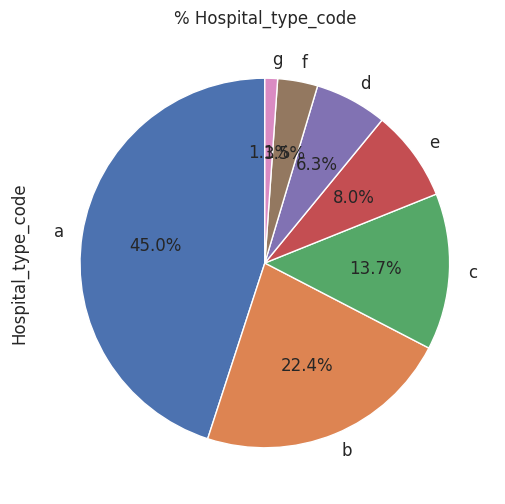

In [46]:
pie_chart(train_df,'Hospital_type_code',8)

<function matplotlib.pyplot.show(close=None, block=None)>

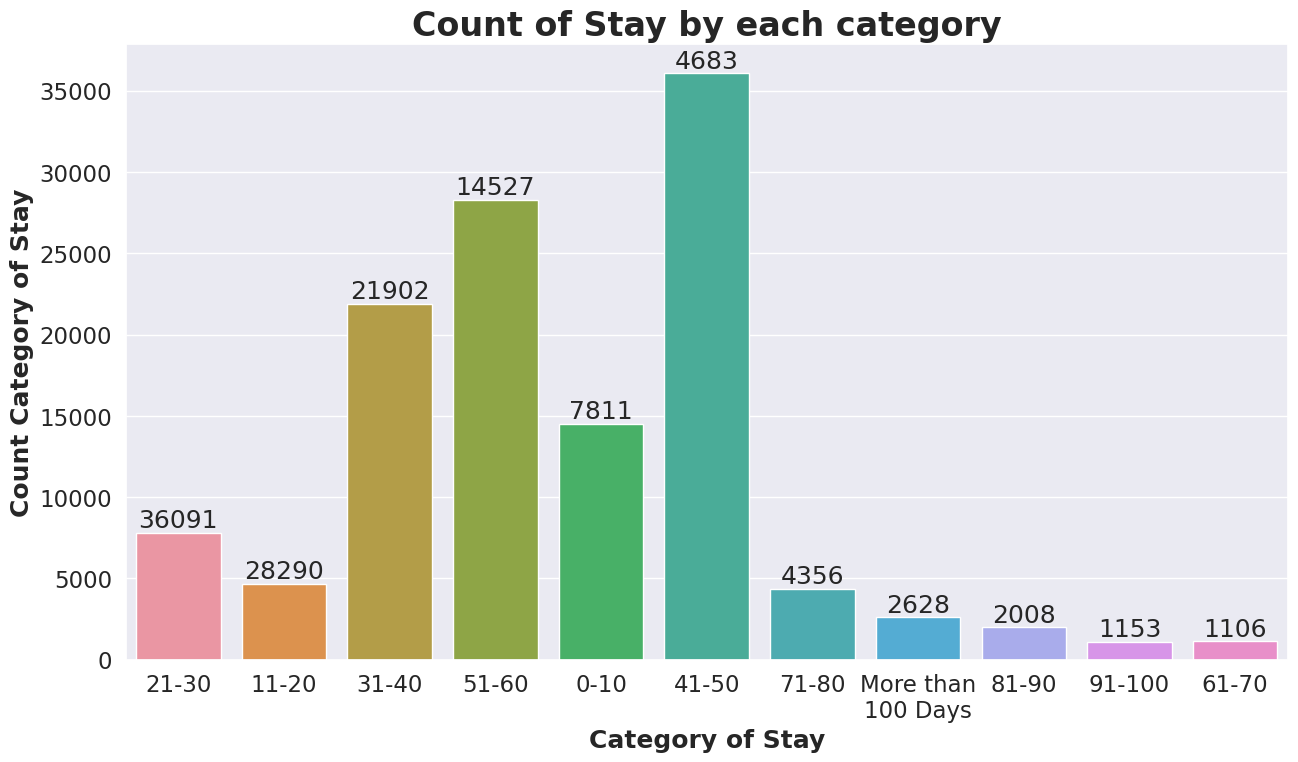

In [47]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Stay',data=train_df)
plt.xlabel("Category of Stay",weight='bold',fontsize=18)
plt.ylabel("Count Category of Stay",weight='bold',fontsize=18)
plt.title("Count of Stay by each category",weight='bold',fontsize=24)

#adding the text labels
rects = ax.patches
labels = train_df['Stay'].value_counts().tolist()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

c_labels = train_df['Stay'].value_counts().index.tolist()
c_name=[textwrap.fill(text,10) for text in c_labels]
pos = np.arange(len(c_name)) 
plt.xticks(pos, c_name)
plt.show


In [32]:
# Check the cardinality of each columns
cardinality_df = pd.DataFrame()
l = []
for i in range(len(train_df.columns)):
#     print(i)
    distinct_count = train_df[train_df.columns[i]].value_counts().count()
    l.append(distinct_count)
col_name = train_df.columns.tolist()
cardinality_df["Columns_Name"]= col_name
cardinality_df['Cardinality_Count'] = l
cardinality_df

,Columns_Name,Cardinality_Count
0,case_id,74988
1,Hospital_code,32
2,Hospital_type_code,7
3,City_Code_Hospital,11
4,Hospital_region_code,3
5,Available Extra Rooms in Hospital,15
6,Department,5
7,Ward_Type,6
8,Ward_Facility_Code,6
9,Bed Grade,4


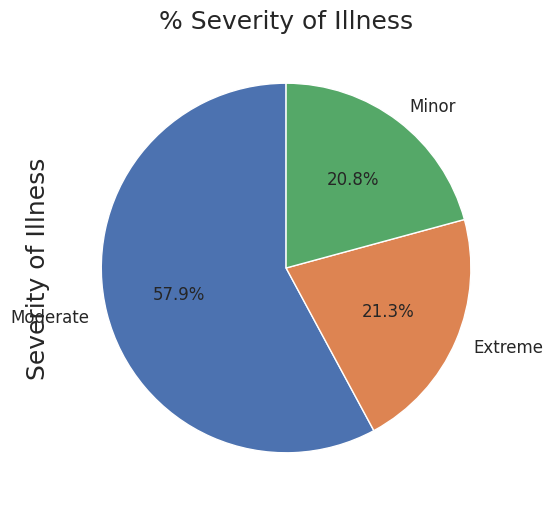

In [48]:
pie_chart(train_df,'Severity of Illness',8)

<ipython-input-49-2ef2d9344143>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  t2 = t1.pivot('Type of Admission','Severity of Illness','count_of_Stay')


<Figure size 1000x600 with 0 Axes>

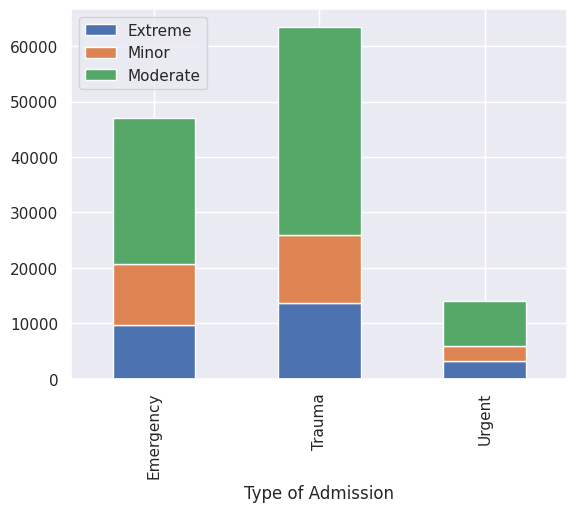

In [49]:
sns.set(font_scale = 1)
plt.figure(figsize=(10,6))
t1 = train_df.groupby(['Type of Admission','Severity of Illness'])[['Stay']].count().add_prefix('count_of_').reset_index()
t2 = t1.pivot('Type of Admission','Severity of Illness','count_of_Stay')
t2.plot(kind='bar',stacked=True)
plt.legend(loc=2)
plt.show()

<Figure size 1000x600 with 0 Axes>

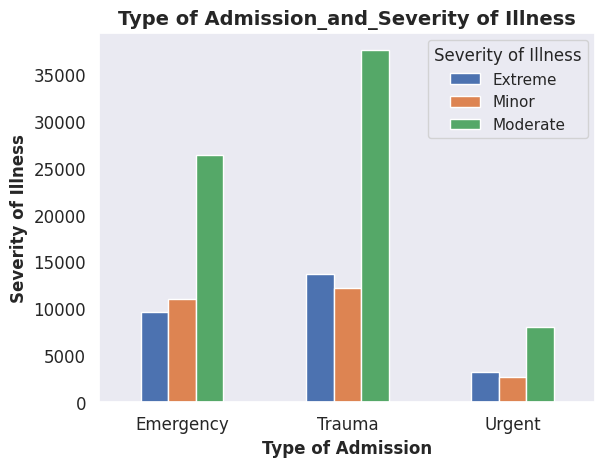

In [50]:
sns.set(font_scale = 1)
plt.figure(figsize=(10,6))
rel_cat(train_df,'Type of Admission','Severity of Illness',8,stacked=None)

In [51]:
train_df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [52]:
cols = ['Hospital_type_code','City_Code_Hospital',
       'Hospital_region_code'
       ,'Department'
       ,'Ward_Type',
       'Ward_Facility_Code',
       'Bed Grade','Type of Admission','Severity of Illness','Age']

In [53]:
train_df['is_train'] = 1
test_df['is_train'] = 0
df = pd.concat([train_df,test_df])

In [54]:
from sklearn.preprocessing import LabelEncoder

for i in cols:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype('str'))

In [55]:
df.shape

(257808, 19)

In [56]:
df['Stay'].value_counts()

21-30                 36091
11-20                 28290
31-40                 21902
51-60                 14527
0-10                   7811
41-50                  4683
71-80                  4356
More than 100 Days     2628
81-90                  2008
91-100                 1153
61-70                  1106
Name: Stay, dtype: int64

In [57]:
df['Stay'] = df['Stay'].map({'0-10':0,'11-20':1,'21-30':2,
                             '31-40':3,'41-50':4,'51-60':5,'61-70':6,
                             '71-80':7,'81-90':8,'91-100':9,'More than 100 Days':10})

In [58]:
train = df[df['is_train'] == 1]

In [29]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,is_train
0,1,8,2,5,2,3,3,2,5,1,31397.0,7.0,0,0,2.0,5,4911.0,0.0,1
1,2,2,2,7,2,2,3,3,5,1,31397.0,7.0,1,0,2.0,5,5954.0,4.0,1
2,3,10,4,0,0,2,1,3,4,1,31397.0,7.0,1,0,2.0,5,4745.0,3.0,1
3,4,26,1,4,1,2,3,2,3,1,31397.0,7.0,1,0,2.0,5,7272.0,4.0,1
4,5,26,1,4,1,2,3,3,3,1,31397.0,7.0,1,0,2.0,5,5558.0,4.0,1


In [28]:
predictor_train = train.drop(['Stay','is_train','case_id'],axis=1)
target_train    = train['Stay']

In [30]:
predictor_test = test_df.drop(['is_train','case_id'],axis=1)

In [31]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        Encoder = LabelEncoder()
        for column in encoding_columns :
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
#         display(encoding_data[encoding_columns])
        encoding_data = pd.get_dummies( encoding_data  )
        
    elif encoding_strategy == "TargetEncoding":
        ## Code Coming soon
        print("TargetEncoding")

    else :
        encoding_data = pd.get_dummies( encoding_data[encoding_columns]  )
        
    dtypes_list =['float64','float32','int64','int32']
    # BEST CODE : 0.6872386379302422
#     encoding_data.astype( dtypes_list[0] ).dtypes # UNCOMMENTED EARLIER
    # NEW CODE : 0.6872386379302422 - NO CHANGE !!!
    # encoding_data.astype( dtypes_list[0] ).dtypes - COMMENTED NOW
    
    return encoding_data

In [59]:
encoding_columns  = cols
encoding_strategy = [ "OneHotEncoding", "LabelEncoding", "TargetEncoding", "ELSE"]

predictor_train_encode = data_encoding( encoding_strategy[1] , predictor_train , encoding_columns )
predictor_test_encode  = data_encoding( encoding_strategy[1] , predictor_test ,  encoding_columns )

In [60]:
print("predictor_train_encode SHAPE   : ",predictor_train_encode.shape)
display("predictor_train_encode COLUMNS : ",predictor_train_encode.head())

print("predictor_test_encode SHAPE   : ",predictor_test_encode.shape)
display("predictor_test_encode COLUMNS : ",predictor_test_encode.head())

predictor_train_encode SHAPE   :  (74988, 16)


'predictor_train_encode COLUMNS : '

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8,2,5,2,3,3,2,5,1,31397.0,7.0,0,0,2.0,5,4911.0
1,2,2,7,2,2,3,3,5,1,31397.0,7.0,1,0,2.0,5,5954.0
2,10,4,0,0,2,1,3,4,1,31397.0,7.0,1,0,2.0,5,4745.0
3,26,1,4,1,2,3,2,3,1,31397.0,7.0,1,0,2.0,5,7272.0
4,26,1,4,1,2,3,3,3,1,31397.0,7.0,1,0,2.0,5,5558.0


predictor_test_encode SHAPE   :  (79820, 16)


'predictor_test_encode COLUMNS : '

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21,2,2,2,3,2,3,0,1,17006.0,2.0,0,2,2.0,7,3095.0
1,29,0,3,0,2,2,3,5,1,17006.0,2.0,1,2,4.0,7,4018.0
2,26,1,1,1,3,2,1,3,3,17006.0,2.0,0,2,3.0,7,4492.0
3,6,0,5,0,3,2,1,5,1,17006.0,2.0,1,2,3.0,7,4173.0
4,28,1,9,0,2,2,2,5,1,17006.0,2.0,1,2,4.0,7,4161.0


In [61]:
lgb_model = LGBMClassifier(
                                   boosting_type='gbdt', 
                                   max_depth=15, 
                                   learning_rate=0.15, 
                                   objective='multiclass', # Multi Class Classification
                                   random_state=100,  
                                   n_estimators=1000 ,
                                   reg_alpha=0, 
                                   reg_lambda=1, 
                                   n_jobs=-1
                                 )